In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
from matplotlib.ticker import ScalarFormatter
import pandas as pd
import datetime as dt

In [9]:
def PlotGraph(data_, title=None, xlabel=None, ylabel=None, xmin=0, xmax=-1, ymin=0, ymax=-1, max_tasks=None, fout="scatter.png", log=False, NDPI=300):
    
    # Create figure and axes
    fig, ax = plt.subplots()

    data_["time_CDT"] = data_["time"] - (5*60*60)
    data_["timestamps_CDT"] = [dt.datetime.fromtimestamp(ts) for ts in data_["time_CDT"]]


    # Make plot
    # ax.scatter(data_["x"], data_["y"], fmt='o', color='r', markersize=4, inestyle='-') 
    # ax.scatter(data_["x"], data_["y"], color='black', s=16, edgecolor='black', marker='o')
    plt.plot(data_["timestamps_CDT"], data_["completed_tasks"], color='r', linestyle='-', linewidth="2")

    if log: 
        ax.set_yscale("log")

    # # Draw a line at max
    if max_tasks:
        ax.axhline(y=max_tasks, color='grey', linestyle='--', linewidth=1)
        
    
    # # Draw a line at 6 hours
    # x12 = dt.datetime.fromtimestamp(data_["time_CDT"][0]+(11*3600))
    # ax.axvline(x=x12, color='grey', linestyle='--', linewidth=1)
    
    # # Draw a line at 25 hours
    # x25 = dt.datetime.fromtimestamp(data_["time_CDT"][0]+(26.5*3600))
    # ax.axvline(x=x25, color='grey', linestyle='--', linewidth=1)

    # Set title, xlabel, and ylabel
    ax.set_title(title, fontsize=15, pad=10)
    ax.set_xlabel(xlabel, fontsize=13, labelpad=10)
    ax.set_ylabel(ylabel, fontsize=13, labelpad=10)

    # Formatting the x-axis with date labels
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))  # Set major ticks every hour
    
    # Rotate date labels for better readability
    plt.gcf().autofmt_xdate()

    # Set font size of tick labels on x and y axes
    ax.tick_params(axis='x', labelsize=13)  
    ax.tick_params(axis='y', labelsize=13)  

    # Scientific notation
    # if (ax.get_ylim()[1] > 9.999e3) or (ax.get_ylim()[1] < 9.999e-3):
    #         ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    #         ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    #         ax.yaxis.offsetText.set_fontsize(14)

    # Set axis limits
    if (ymax > ymin):
        ax.set_ylim(ymin, ymax)

    if (xmax > xmin):
        ax.set_xlim(xmin, xmax)

    # Draw a second percent axis if max_tasks is provided
    if max_tasks: # is not None:
        ax2 = ax.twinx()  # Create a second axes that shares the same x-axis
        percent_completed = (data_["completed_tasks"] / max_tasks) * 100
        ax2.plot(data_["timestamps_CDT"], percent_completed, linewidth=0)
        ax2.set_ylabel("Completion [%]", fontsize=13, labelpad=10)
        ax2.tick_params(axis='y', labelsize=13)
        ax2.axhline(y=100, color='grey', linestyle='--', linewidth=1)
        # ax2.set_ylim(0, 100)  # Set the y-axis limit from 0 to 100%

   # Save the figure
    plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
    print("---> Written", fout)
    
    plt.tight_layout()
    plt.show()
    
    # Clear memory
    plt.close()

    return



---> 96.864% complete!


---> Written ../Images/MDC2020ae/Monitoring/Jobs_1726275244.png


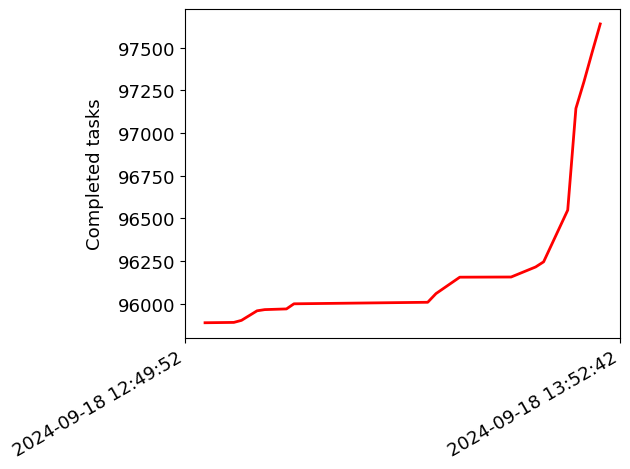

          time  completed_tasks    time_CDT      timestamps_CDT
0   1726681964            95888  1726663964 2024-09-18 12:52:44
1   1726682214            95890  1726664214 2024-09-18 12:56:54
2   1726682280            95902  1726664280 2024-09-18 12:58:00
3   1726682415            95958  1726664415 2024-09-18 13:00:15
4   1726682482            95965  1726664482 2024-09-18 13:01:22
5   1726682670            95969  1726664670 2024-09-18 13:04:30
6   1726682735            95999  1726664735 2024-09-18 13:05:35
7   1726683895            96008  1726665895 2024-09-18 13:24:55
8   1726683967            96059  1726665967 2024-09-18 13:26:07
9   1726684173            96155  1726666173 2024-09-18 13:29:33
10  1726684618            96156  1726666618 2024-09-18 13:36:58
11  1726684831            96215  1726666831 2024-09-18 13:40:31
12  1726684900            96245  1726666900 2024-09-18 13:41:40
13  1726685109            96548  1726667109 2024-09-18 13:45:09
14  1726685180            97144  1726667

In [16]:
# data1_ = pd.read_csv("../Txt/Monitoring/third_pass.csv")
# data2_ = pd.read_csv("../Txt/Monitoring/third_pass.2.csv")
# data_ = pd.concat([data1_, data2_], ignore_index=True)
# print(data_)

data_ = pd.read_csv("../Txt/Monitoring/completion_log_1726681961.csv") #  ../Txt/Monitoring/completion_log_1724884500.csv")
percentComplete = data_["completed_tasks"].iloc[-1]*100/100800
print(f"\n\n---> {percentComplete:.3f}% complete!\n\n")
PlotGraph(data_, ylabel="Completed tasks", fout="../Images/MDC2020ae/Monitoring/Jobs_1726275244.png", max_tasks=None)#100800)
print(data_)

In [4]:
# Plot completed tasks versus time.

# data_["time_CDT"] = data_["time"] - (5*60*60)
# times_ = [dt.datetime.fromtimestamp(ts) for ts in data_["time_CDT"]]
